# Preparation

Preparation biasa dilakukan untuk mempersiapkan data sebelum masuk dalam tahap pemodelan. <br>
Berikut adalah tahapan yang akan dilalui pada data `SC_HW1_bank_data.csv` sebelum tahap pemodelan :
1. Import Library
2. Input Dataset
3. Preprocessing
4. Train-Test Split

## Import Library

In [ ]:
import pandas as pd
import numpy as np
from warnings import filterwarnings as fw; fw("ignore")

## Input Dataset

In [ ]:
#Membaca data dan memasukkannya ke dalam bentuk Pandas Dataframe
df = pd.read_csv('https://raw.githubusercontent.com/Rietaros/kampus_merdeka/main/SC_HW1_bank_data.csv')

In [ ]:
#Jalankan code untuk mengecek nama kolom yang tersedia
df.columns

Index(['RowNumber', 'CustomerId', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')

In [ ]:
df.head()

,RowNumber,CustomerId,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#Hilangkan kolom yang dirasa tidak relevan dengan model (contoh: ID). None dapat diisi dengan nama-nama kolom yang akan digunakan.
#Contoh df = df[['X1','X2', 'Y']].copy()

#START CODE
df = df[['Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']].copy()

## Preprocessing

In [ ]:
#Lakukan One-Hot Encoder untuk data categorical, dengan fungsi pandas get_dummies

#START CODE
df = pd.get_dummies(df)
df.head()

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
#Pisahkan mana X (feature) dengan Y,
#Y adalah kolom "Exited"

#START CODE
X = df.loc[:, df.columns != 'Exited']
y = df['Exited']

In [ ]:
#Lakukan Scaler dan/atau Noermalisasi jika diperlukan
from sklearn.preprocessing import MinMaxScaler

#START CODE
scaler = MinMaxScaler()
X['Balance'] = scaler.fit_transform(X['Balance'].values.reshape(len(X),1))
X['EstimatedSalary'] = scaler.fit_transform(X['EstimatedSalary'].values.reshape(len(X),1))

# X_transform = scaler.fit_transform(X)

In [ ]:
# Copy dataset
X_transform = X.copy()

In [ ]:
X_transform

,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,42,2,0.000000,1,1,1,0.506735,1,0,0,1,0
1,41,1,0.334031,1,0,1,0.562709,0,0,1,1,0
2,42,8,0.636357,3,1,0,0.569654,1,0,0,1,0
3,39,1,0.000000,2,0,0,0.469120,1,0,0,1,0
4,43,2,0.500246,1,1,1,0.395400,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,39,5,0.000000,2,1,0,0.481341,1,0,0,0,1
9996,35,10,0.228657,1,1,1,0.508490,1,0,0,0,1
9997,36,7,0.000000,1,0,1,0.210390,1,0,0,1,0
9998,42,3,0.299226,2,1,0,0.464429,0,1,0,0,1


## Train-Test Split

In [ ]:
#Split menjadi train dan test dengan test_size 25%
#Tidak perlu mengubah code ini

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_transform,y,test_size = 0.25,random_state = 42)

# Modeling

## Model1

### Soal :
Jelaskan secara Singkat Model pertama yang digunakan!
Jawab: **Random Forest** adalah bentuk dari **ensemble learning**, yang berarti algoritma ini menggabungkan hasil dari beberapa model (dalam kasus ini, **pohon keputusan**) untuk membuat prediksi yang lebih baik daripada model tunggal. **Random Forest** menggunakan pohon keputusan sebagai model dasar. Setiap pohon keputusan digunakan untuk membuat prediksi, dan hasilnya digabungkan melalui voting (klasifikasi) atau averaging (regresi).

In [ ]:
# START CODE
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
          'n_estimators': [30, 50, 100],
          'max_depth': [5, 10, 20],
          'min_samples_split': [2, 5, 10],
          'min_samples_leaf': [1, 5, 10],
          'class_weight': [None, 'balanced']
}
# END CODE

#Lakukan parameter tuning
from sklearn.model_selection import GridSearchCV
grid1 = GridSearchCV(
             estimator= model1,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = -1, # core cpu yang digunakan
             cv = 5 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid1.fit(X_train,y_train)
grid1.best_params_

{'class_weight': None,
 'max_depth': 20,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
#lakukan evaluasi dengan beberapa maetric di bawah ini
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid1.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test,y_pred),"\n")
print("Confussion Matrix: \n\n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy Score: \n\n",accuracy_score(y_test, y_pred),"\n")
# print(accuracy_score(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.45      0.57       497

    accuracy                           0.87      2500
   macro avg       0.83      0.71      0.75      2500
weighted avg       0.86      0.87      0.85      2500
 

Confussion Matrix: 

 [[1939   64]
 [ 272  225]] 

Accuracy Score: 

 0.8656 



## Model2
### Soal :
Jelaskan secara Singkat Model ke-2 yang digunakan!

Jawab: **LGBM (Light Gradient Boosting Machine)** adalah algoritma machine learning ensemble yang berdasarkan konsep **gradient boosting** seperti **XGBoost**. LGBM menggunakan pendekatan pertumbuhan pohon yang berbeda, yaitu **leaf-wise growth**.

In [ ]:
#START CODE
from lightgbm import LGBMClassifier

model2 = LGBMClassifier(random_state=42)
params = {
          'n_estimators': [100, 250, 1000],
          'learning_rate': [0.01, 0.05, 0.1],
          'max_depth': [3, 5, 7],
          'min_child_samples': [10, 20, 30],
          'class_weight': [None, 'balanced']}
#END CODE

#Lakukan parameter tuning
from sklearn.model_selection import GridSearchCV
grid2 = GridSearchCV(
             estimator= model2,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = -1, # core cpu yang digunakan
             cv = 5 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid2.fit(X_train,y_train)
grid2.best_params_

[LightGBM] [Info] Number of positive: 1540, number of negative: 5960
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 605
[LightGBM] [Info] Number of data points in the train set: 7500, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205333 -> initscore=-1.353288
[LightGBM] [Info] Start training from score -1.353288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

{'class_weight': None,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_samples': 30,
 'n_estimators': 100}

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid2.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test,y_pred),"\n")
print("Confussion Matrix: \n\n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy Score: \n\n",accuracy_score(y_test, y_pred),"\n")

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      2003
           1       0.78      0.47      0.59       497

    accuracy                           0.87      2500
   macro avg       0.83      0.72      0.75      2500
weighted avg       0.86      0.87      0.86      2500


[[1938   65]
 [ 263  234]]

0.8688


## Model3
### Soal :
Jelaskan secara Singkat Model ke-3 yang digunakan!

Jawab: **Extreme Gradient Boosting (XGBoost)** adalah algoritma ensemble yang berdasarkan konsep **gradient boosting**. Algoritma ini akan membangun serangkaian pohon keputusan secara berurutan, dan setiap pohon berusaha memperbaiki kesalahan prediksi pohon sebelumnya. **XGBoost** menggunakan pertumbuhan pohon **level-wise**, yaitu pohon tumbuh pada setiap level (tingkat) secara bersamaan.

In [ ]:
#START CODE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

model3 = xgb.XGBClassifier()
params = {'learning_rate': [0.01, 0.1],
          'max_depth': [3, 5, 7],
          'n_estimators': [100, 500, 800]}
#END CODE

#Lakukan parameter tuning
from sklearn.model_selection import GridSearchCV
grid3 = GridSearchCV(
             estimator= model3,
             param_grid= params,
             scoring = 'accuracy',
             n_jobs = -1, # core cpu yang digunakan
             cv = 5 # 3-fold cross validation (artinya kita melakukan iterasi model sebanyak 3 kali)
            )

grid3.fit(X_train,y_train)
grid3.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [ ]:
#lakukan evaluasi
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred = grid3.predict(X_test)

print("Classification Report: \n\n",classification_report(y_test,y_pred),"\n")
print("Confussion Matrix: \n\n",confusion_matrix(y_test,y_pred),"\n")
print("Accuracy Score: \n\n",accuracy_score(y_test, y_pred),"\n")

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2003
           1       0.77      0.47      0.58       497

    accuracy                           0.87      2500
   macro avg       0.82      0.72      0.75      2500
weighted avg       0.86      0.87      0.85      2500


[[1932   71]
 [ 264  233]]

0.866


## Tarik Kesimpulan Model Mana yang terbaik beserta alasannya

<Axes: xlabel='Exited', ylabel='count'>

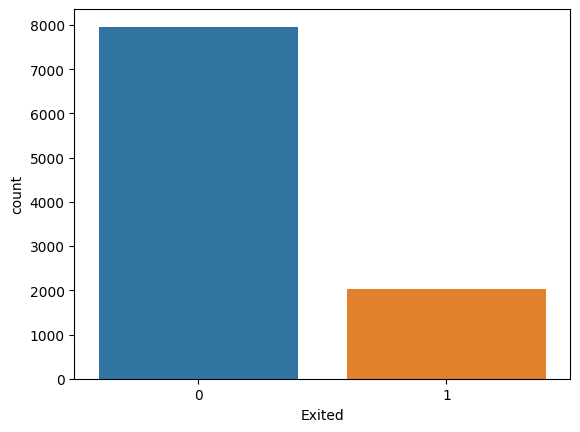

In [ ]:
# Visualisasikan imbalanced data
import seaborn as sns
sns.countplot(x=df["Exited"])

**Kesimpulan:**

Berdasarkan hasil penyetelan model dengan menggunakan **Random Forest**, **LightGBM (LGBM)**, dan **XGBoost**, score yang dihasilkan dari ketiga model tersebut memiliki akurasi yang serupa yaitu berkisar **(86-87)%**. Hal ini dikarenakan ketiga model tersebut merupakan model yang cocok untuk menangani kasus **imbalanced data** dengan perbandingan **80:20**. Terutama untuk model **LightGBM (LGBM)** dan **XGBoost** merupakan model yang memiliki cara kerja yang menggunakan teknik **gradient boosting** dan sering kali memberikan performa yang baik.

Hasil dari akurasi yang didapatkan juga bukan merupakan score terbaik, karena kasus **imbalanced data**, dengan perbandingan **80:20**. Oleh karena itu kita harus memilih **algoritma yang tepat** seperti model diatas yaitu **XGBoost** atau **LGBM** yang dapat menangani kasus seperti diatas dan bisa juga dengan melakukan **Resampling** agar data target menjadi seimbang.